### 1. main data

In [1]:
# read data
df = pd.read_csv('data/GHG_by_sector_and_country.csv', sep = ';', decimal = ',')
df = df[~df.Substance.isnull()]
print(df.shape)
df[:3]

(4828, 57)


,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,CO2,Agriculture,AFG,Afghanistan,0.03,0.03,0.03,0.03,0.04,0.05,0.05,0.06,0.06,0.06,0.06,0.05,0.06,0.06,0.09,0.09,0.08,0.09,0.08,0.08,0.07,0.07,0.06,0.06,NaN,NaN,0.01,0.01,0.01,0.01,0.01,0.04,0.03,0.04,0.04,0.05,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.06,0.08,0.12,0.16,0.31,0.16,0.15,0.06,0.05,0.05
1,CO2,Agriculture,ALB,Albania,0.11,0.11,0.11,0.11,0.11,0.11,0.13,0.14,0.17,0.17,0.16,0.17,0.17,0.17,0.18,0.18,0.18,0.16,0.17,0.19,0.17,0.04,0.02,0.03,0.03,0.03,0.02,0.01,0.04,0.01,0.02,0.02,0.05,0.04,0.06,0.01,0.04,0.04,0.03,0.03,0.02,0.03,0.05,0.03,0.06,0.06,0.05,0.06,0.05,0.07,0.06,0.06,0.06
2,CO2,Agriculture,ARG,Argentina,0.10,0.10,0.10,0.10,0.09,0.08,0.07,0.11,0.12,0.14,0.14,0.09,0.10,0.12,0.18,0.18,0.16,0.16,0.17,0.17,0.18,0.17,0.26,0.28,0.47,0.54,0.82,0.79,0.68,0.73,0.76,0.87,0.85,1.16,1.36,1.03,1.24,1.36,0.92,0.81,1.03,1.12,0.92,1.00,1.15,0.89,1.36,1.28,1.64,1.70,1.93,2.11,2.32


In [2]:
# transpose
df1 = pd.melt(df, id_vars = ['Substance', 'Sector', 'EDGAR Country Code', 'Country'], var_name = 'year', value_name = 'val_mt')
print(df1.shape)
print(df1[df1.val_mt.isnull()].shape)

# fill nulls
feats_gr = ['Country','Sector','Substance']
feat = 'val_mt'
df2 = df1.groupby(feats_gr)
df1[feat] = (df2[feat].fillna(method = 'bfill') + df2[feat].fillna(method = 'ffill')) / 2
df1[feat] = df1[feat].fillna(0)
df1 = df1.sort_values(feats_gr).reset_index()
del df1['index']

# some replaces
df1['Substance'] = df1.Substance.map(lambda x: x.split('_')[-1])
df1['year'] = df1['year'].astype(int)

# add continents
df_codes = pd.read_html('https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_continent_(data_file)')[2]
df_codes.rename(columns = {'a-3':'EDGAR Country Code'}, inplace = True)
df_codes['CC'] = df_codes['CC'].fillna('NA')
print(df_codes.shape)

dict_cont = df_codes.groupby('EDGAR Country Code').CC.min().to_dict()
dict_cont['ARM'] = 'AS'
dict_cont['AZE'] = 'AS'
dict_cont['CYP'] = 'EU'
dict_cont['EGY'] = 'AF'
dict_cont['GEO'] = 'AS'
dict_cont['KAZ'] = 'AS'
dict_cont['RUS'] = 'AS'
dict_cont['TUR'] = 'AS'
dict_cont['UMI'] = 'NA'
dict_cont['SCG'] = 'EU'
dict_cont['ANT'] = 'SA'

df1['Continent'] = df1['EDGAR Country Code'].map(dict_cont)
df1.to_pickle('data/df1.pkl')

print(df1.shape)
df1[:3]

(255884, 6)
(5238, 6)
(262, 5)
(255884, 7)


,Substance,Sector,EDGAR Country Code,Country,year,val_mt,Continent
0,CO2,Agriculture,AFG,Afghanistan,1970,0.03,AS
1,CO2,Agriculture,AFG,Afghanistan,1971,0.03,AS
2,CO2,Agriculture,AFG,Afghanistan,1972,0.03,AS


In [3]:
print(df1.isnull().sum())

Substance                0
Sector                   0
EDGAR Country Code       0
Country                  0
year                     0
val_mt                   0
Continent             3127
dtype: int64


In [4]:
df1.Continent.fillna('').value_counts()

Continent
AF    66144
AS    62964
EU    50827
NA    39114
SA    18762
OC    14946
       3127
Name: count, dtype: int64

In [5]:
f1 = df1['Continent'].isnull()
df1[f1].groupby(['EDGAR Country Code','Country']).size()

EDGAR Country Code  Country               
AIR                 International Aviation     212
EU27                EU27                      1325
GLOBAL TOTAL        GLOBAL TOTAL              1325
SEA                 International Shipping     265
dtype: int64

### 2. per capita

In [6]:
# read data
df = pd.read_csv('data/GHG_per_capita_by_country.csv', sep = ';', decimal = ',')
df = df[~df['EDGAR Country Code'].isnull()]
print(df.shape)
df[:3]

(210, 55)


,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,Aruba,0.76,0.84,1.02,1.09,1.08,1.30,1.29,1.47,1.56,1.63,1.69,1.73,1.70,1.72,1.94,2.02,2.19,2.46,2.72,3.62,3.45,3.74,3.91,3.73,3.88,4.07,2.71,4.13,4.15,3.96,3.70,3.70,3.82,4.25,4.36,4.63,4.57,4.95,4.86,5.19,4.99,3.30,4.00,4.50,4.58,4.57,4.71,4.44,4.75,5.43,4.65,4.48,4.64
1,AFG,Afghanistan,1.56,1.51,1.31,1.33,1.40,1.43,1.40,1.39,1.34,1.31,1.32,1.35,1.38,1.41,1.36,1.39,1.26,1.24,1.25,1.16,1.12,1.07,0.92,0.87,0.82,0.80,0.84,0.87,0.90,0.92,0.80,0.69,0.78,0.77,0.74,0.73,0.71,0.74,0.85,0.94,1.05,1.16,1.06,0.97,0.95,0.93,0.88,0.89,0.86,0.81,0.74,0.74,0.73
2,AGO,Angola,2.97,2.89,3.20,3.35,3.36,3.11,2.53,3.03,3.19,3.16,3.12,2.86,2.79,2.88,2.87,2.95,3.01,3.13,3.27,3.22,2.87,2.77,2.62,2.82,3.53,3.95,4.59,4.65,4.87,4.78,4.35,4.08,3.87,3.75,3.95,3.76,3.28,3.13,3.22,3.16,3.34,3.17,3.12,3.19,3.16,3.23,3.02,2.75,2.54,2.44,2.18,2.05,1.90


In [7]:
# transpose
df1 = pd.melt(df, id_vars = ['EDGAR Country Code', 'Country'], var_name = 'year', value_name = 'val_capita_ghg')
print(df1.shape)
print(df1[df1.val_capita_ghg.isnull()].shape)
df1[:3]

(11130, 4)
(0, 4)


,EDGAR Country Code,Country,year,val_capita_ghg
0,ABW,Aruba,1970,0.76
1,AFG,Afghanistan,1970,1.56
2,AGO,Angola,1970,2.97


In [8]:
df2 = df1.copy()

In [9]:
# read data
df = pd.read_csv('data/fossil_CO2_per_capita_by_countr.csv', sep = ';', decimal = ',')
df = df[~df['EDGAR Country Code'].isnull()]
del df['Substance']
print(df.shape)
df[:3]

(210, 55)


,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,Aruba,0.43,0.48,0.66,0.74,0.72,0.95,0.93,1.11,1.20,1.27,1.33,1.37,1.34,1.36,1.57,1.65,1.82,2.08,2.34,3.24,3.05,3.33,3.50,3.33,3.47,3.67,2.33,3.73,3.73,3.55,2.71,2.73,2.87,3.26,3.31,3.58,3.82,4.19,4.15,4.52,4.43,2.70,3.59,4.12,4.19,4.19,4.33,4.05,4.36,5.03,4.26,4.09,4.25
1,AFG,Afghanistan,0.16,0.15,0.14,0.14,0.18,0.16,0.15,0.17,0.15,0.15,0.15,0.17,0.18,0.24,0.27,0.35,0.34,0.28,0.27,0.25,0.24,0.21,0.12,0.11,0.09,0.08,0.07,0.07,0.07,0.07,0.05,0.05,0.04,0.05,0.04,0.05,0.06,0.08,0.15,0.23,0.28,0.40,0.33,0.27,0.25,0.26,0.23,0.24,0.22,0.20,0.14,0.14,0.14
2,AGO,Angola,1.32,1.23,1.46,1.56,1.58,1.42,0.93,1.48,1.70,1.64,1.61,1.43,1.33,1.33,1.30,1.33,1.31,1.30,1.30,1.28,0.93,0.94,0.94,0.91,0.84,0.91,1.07,1.09,1.10,1.14,1.01,0.96,0.91,0.96,0.94,0.82,0.83,0.82,0.90,0.95,0.98,0.98,0.96,1.07,1.13,1.17,1.06,0.88,0.80,0.80,0.63,0.64,0.58


In [10]:
# transpose
df1 = pd.melt(df, id_vars = ['EDGAR Country Code', 'Country'], var_name = 'year', value_name = 'val_capita_co2')
print(df1.shape)
print(df1[df1.val_capita_co2.isnull()].shape)
df1[:3]

(11130, 4)
(0, 4)


,EDGAR Country Code,Country,year,val_capita_co2
0,ABW,Aruba,1970,0.43
1,AFG,Afghanistan,1970,0.16
2,AGO,Angola,1970,1.32


In [11]:
# merge
df2 = df2.merge(df1)
df2['Continent'] = df2['EDGAR Country Code'].map(dict_cont)
df2['year'] = df2['year'].astype(int)
print(df2.shape)
df2[:5]

(11130, 6)


,EDGAR Country Code,Country,year,val_capita_ghg,val_capita_co2,Continent
0,ABW,Aruba,1970,0.76,0.43,NA
1,AFG,Afghanistan,1970,1.56,0.16,AS
2,AGO,Angola,1970,2.97,1.32,AF
3,AIA,Anguilla,1970,0.66,0.34,NA
4,ALB,Albania,1970,3.84,2.25,EU


In [12]:
df2.Continent.fillna('').value_counts()

Continent
AF    2968
AS    2650
EU    2120
NA    1802
SA     795
OC     689
       106
Name: count, dtype: int64

In [13]:
f1 = df2['Continent'].isnull()
df2[f1].groupby(['EDGAR Country Code','Country']).size()

EDGAR Country Code  Country     
EU27                EU27            53
GLOBAL TOTAL        GLOBAL TOTAL    53
dtype: int64

In [14]:
df_cap = df2.copy()

### 3. per gdp

In [15]:
# read data
df = pd.read_csv('data/GHG_per_GDP_by_country.csv', sep = ';', decimal = ',')
df = df[~df['EDGAR Country Code'].isnull()]
print(df.shape)
df[:3]

(210, 35)


,EDGAR Country Code,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,Aruba,0.11,0.11,0.12,0.11,0.11,0.12,0.08,0.12,0.12,0.11,0.10,0.10,0.11,0.12,0.12,0.13,0.12,0.13,0.13,0.15,0.15,0.10,0.12,0.13,0.13,0.13,0.13,0.11,0.12,0.13,0.14,0.12,0.10
1,AFG,Afghanistan,0.45,0.51,0.47,0.63,0.82,0.56,0.65,0.74,0.81,0.91,0.86,0.82,0.63,0.61,0.60,0.55,0.53,0.50,0.56,0.53,0.53,0.60,0.50,0.45,0.44,0.44,0.42,0.43,0.42,0.39,0.37,0.48,0.48
2,AGO,Angola,0.51,0.50,0.52,0.76,0.97,0.98,1.03,1.00,1.03,1.01,0.92,0.86,0.74,0.72,0.71,0.61,0.49,0.43,0.41,0.41,0.43,0.41,0.39,0.39,0.38,0.40,0.40,0.38,0.36,0.36,0.36,0.34,0.32


In [16]:
# transpose
feats_gr = ['EDGAR Country Code', 'Country']
feat = 'val_gdp_ghg'
df1 = pd.melt(df, id_vars = feats_gr, var_name = 'year', value_name = feat)
print(df1.shape)
print(df1[df1[feat].isnull()].shape)
df1[:3]

(6930, 4)
(330, 4)


,EDGAR Country Code,Country,year,val_gdp_ghg
0,ABW,Aruba,1990,0.11
1,AFG,Afghanistan,1990,0.45
2,AGO,Angola,1990,0.51


In [17]:
df1.groupby(feats_gr)[feat].count().sort_values()[:12]

EDGAR Country Code  Country                                     
COK                 Cook Islands                                     0
GLP                 Guadeloupe                                       0
ESH                 Western Sahara                                   0
REU                 Réunion                                          0
MTQ                 Martinique                                       0
GUF                 French Guiana                                    0
FLK                 Falkland Islands                                 0
SPM                 Saint Pierre and Miquelon                        0
SHN                 Saint Helena, Ascension and Tristan da Cunha     0
FRO                 Faroes                                           0
NER                 Niger                                           33
NGA                 Nigeria                                         33
Name: val_gdp_ghg, dtype: int64

In [18]:
df2 = df1.copy()

In [19]:
# read data
df = pd.read_csv('data/fossil_CO2_per_GDP_by_country.csv', sep = ';', decimal = ',')
df = df[~df['EDGAR Country Code'].isnull()]
del df['Substance']
print(df.shape)
df[:3]

(210, 35)


,EDGAR Country Code,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,Aruba,0.09,0.10,0.10,0.10,0.10,0.11,0.07,0.11,0.11,0.10,0.07,0.07,0.08,0.09,0.09,0.10,0.10,0.11,0.11,0.13,0.13,0.08,0.11,0.12,0.12,0.11,0.12,0.10,0.11,0.12,0.13,0.11,0.09
1,AFG,Afghanistan,0.09,0.10,0.06,0.08,0.09,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.04,0.04,0.03,0.04,0.04,0.05,0.10,0.13,0.14,0.21,0.16,0.13,0.12,0.12,0.11,0.11,0.11,0.09,0.07,0.09,0.09
2,AGO,Angola,0.16,0.17,0.19,0.25,0.23,0.23,0.24,0.23,0.23,0.24,0.21,0.20,0.17,0.18,0.17,0.13,0.12,0.11,0.11,0.12,0.13,0.13,0.12,0.13,0.14,0.15,0.14,0.12,0.11,0.12,0.10,0.11,0.10


In [20]:
# transpose
feats_gr = ['EDGAR Country Code', 'Country']
feat = 'val_gdp_co2'
df1 = pd.melt(df, id_vars = feats_gr, var_name = 'year', value_name = feat)
print(df1.shape)
print(df1[df1[feat].isnull()].shape)
df1[:3]

(6930, 4)
(330, 4)


,EDGAR Country Code,Country,year,val_gdp_co2
0,ABW,Aruba,1990,0.09
1,AFG,Afghanistan,1990,0.09
2,AGO,Angola,1990,0.16


In [21]:
df1.groupby(feats_gr)[feat].count().sort_values()[:12]

EDGAR Country Code  Country                                     
COK                 Cook Islands                                     0
GLP                 Guadeloupe                                       0
ESH                 Western Sahara                                   0
REU                 Réunion                                          0
MTQ                 Martinique                                       0
GUF                 French Guiana                                    0
FLK                 Falkland Islands                                 0
SPM                 Saint Pierre and Miquelon                        0
SHN                 Saint Helena, Ascension and Tristan da Cunha     0
FRO                 Faroes                                           0
NER                 Niger                                           33
NGA                 Nigeria                                         33
Name: val_gdp_co2, dtype: int64

In [22]:
# merge
filt = ~df2.val_gdp_ghg.isnull()
df2 = df2[filt].merge(df1)
df2['Continent'] = df2['EDGAR Country Code'].map(dict_cont)
df2['year'] = df2['year'].astype(int)
print(df2.shape)
df2[:5]

(6600, 6)


,EDGAR Country Code,Country,year,val_gdp_ghg,val_gdp_co2,Continent
0,ABW,Aruba,1990,0.11,0.09,NA
1,AFG,Afghanistan,1990,0.45,0.09,AS
2,AGO,Angola,1990,0.51,0.16,AF
3,AIA,Anguilla,1990,0.04,0.02,NA
4,ALB,Albania,1990,0.73,0.42,EU


In [23]:
df_gdp = df2.copy()

### 4. merge

In [29]:
# create aggs for per capita merge
df = pd.read_pickle('data/df1.pkl')
feats_gr = ['EDGAR Country Code','Country','year']
filt = df.Substance == 'CO2'

df01 = df.groupby(feats_gr).val_mt.sum().reset_index()
df02 = df[filt].groupby(feats_gr).val_mt.sum().reset_index()
df0 = df01.merge(df02, on = feats_gr).set_index(feats_gr)
df0.columns = ['val_ghg','val_co2']
df0.reset_index(inplace = True)
print(df0.shape)
df0[:3]

(11236, 5)


,EDGAR Country Code,Country,year,val_ghg,val_co2
0,ABW,Aruba,1970,0.05,0.03
1,ABW,Aruba,1971,0.05,0.03
2,ABW,Aruba,1972,0.06,0.04


In [30]:
# merge
df4 = df_cap.merge(df_gdp, how = 'left').merge(df0)
print(df4.shape)
df4[:5]

(11130, 10)


,EDGAR Country Code,Country,year,val_capita_ghg,val_capita_co2,Continent,val_gdp_ghg,val_gdp_co2,val_ghg,val_co2
0,ABW,Aruba,1970,0.76,0.43,NA,NaN,NaN,0.05,0.03
1,AFG,Afghanistan,1970,1.56,0.16,AS,NaN,NaN,17.34,1.73
2,AGO,Angola,1970,2.97,1.32,AF,NaN,NaN,20.14,8.95
3,AIA,Anguilla,1970,0.66,0.34,NA,NaN,NaN,0.00,0.00
4,ALB,Albania,1970,3.84,2.25,EU,NaN,NaN,8.26,4.85


In [31]:
# calculate
df4['population'] = df4.val_ghg / df4.val_capita_ghg * 1000000
df4['population2'] = df4.val_co2 / df4.val_capita_co2 * 1000000
df4['gdp_gusd'] = df4.val_ghg / df4.val_gdp_ghg
df4['gdp2_gusd'] = df4.val_co2 / df4.val_gdp_co2

In [55]:
df4['gdp_cap'] = df4.gdp_gusd / df4.population * 1000000000

### data check

In [1]:
# df4[df4.year == 2022].sort_values('gdp_cap', ascending = False)[:20]

In [39]:
# check
df4['d1'] = (df4.population - df4.population2).abs()
df4['d2'] = (df4.gdp_gusd - df4.gdp2_gusd).abs()

In [49]:
df4[df4.d1 > 1000000].sort_values('d1', ascending = False).Country.unique()

array(['Democratic Republic of the Congo', 'Laos', 'Madagascar'],
      dtype=object)

<Axes: xlabel='year'>

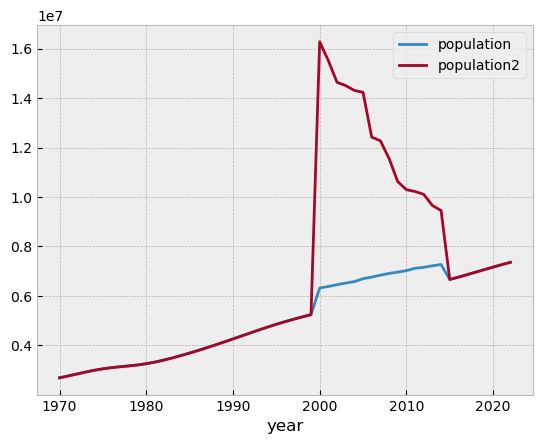

In [47]:
feats1 = ['population','population2']
df4[df4.Country == 'Laos'].set_index('year')[feats1].plot()

<Axes: xlabel='year'>

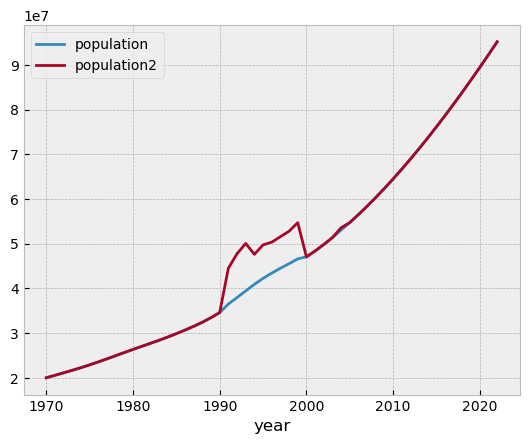

In [50]:
feats1 = ['population','population2']
df4[df4.Country == 'Democratic Republic of the Congo'].set_index('year')[feats1].plot()

<Axes: xlabel='year'>

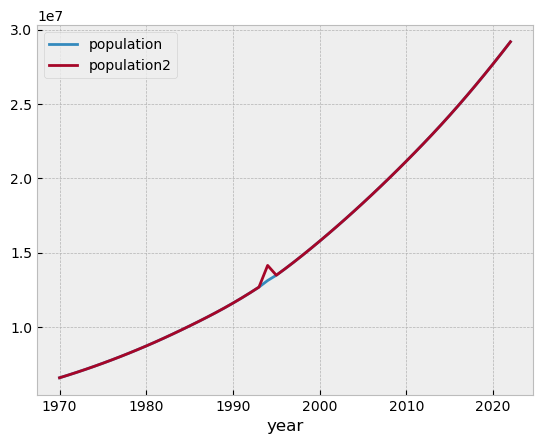

In [51]:
feats1 = ['population','population2']
df4[df4.Country == 'Madagascar'].set_index('year')[feats1].plot()

In [58]:
# save to pickle
del df4['population2']
del df4['gdp2_gusd']
del df4['d1']
del df4['d2']
df4.to_pickle('data/df2.pkl')